### Homework 2: Neel Sheth, Yvonne Wang, Andrew Gillock (Group 20)

### Setup

In [162]:
import numpy as np
import pandas as pd
%pylab inline

df = pd.read_csv("NYC_Restaurants.csv", dtype=str)
print(df)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
      Unnamed: 0     CAMIS          DBA       BORO BUILDING           STREET  \
0              0  30112340      WENDY'S   BROOKLYN      469  FLATBUSH AVENUE   
1              1  30112340      WENDY'S   BROOKLYN      469  FLATBUSH AVENUE   
2              2  30112340      WENDY'S   BROOKLYN      469  FLATBUSH AVENUE   
3              3  30112340      WENDY'S   BROOKLYN      469  FLATBUSH AVENUE   
4              4  30112340      WENDY'S   BROOKLYN      469  FLATBUSH AVENUE   
...          ...       ...          ...        ...      ...              ...   
44628      44628  50019095        EARLY   BROOKLYN      967    MANHATTAN AVE   
44629      44629  50019107  TESHIGOTOYA  MANHATTAN      432        E 13TH ST   
44630      44630  50019107  TESHIGOTOYA  MANHATTAN      432        E 13TH ST   
44631      44631  50019107  TESHIGOTOYA  MANHATTAN      4

### Q1 

In [179]:
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE'] + " " + df['BORO']
print(df['RESTAURANT'].iloc[:10])

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


### Q2

In [164]:
len(df['RESTAURANT'].drop_duplicates())

10114

### Q3

In [165]:
df_chains = df.drop_duplicates(['RESTAURANT'])['DBA'].value_counts() 
len((df_chains[df_chains >= 2])) # Count number that occur twice or more

368

### Q4

Text(0.5, 1.0, 'Popularity of Chain Restaurants')

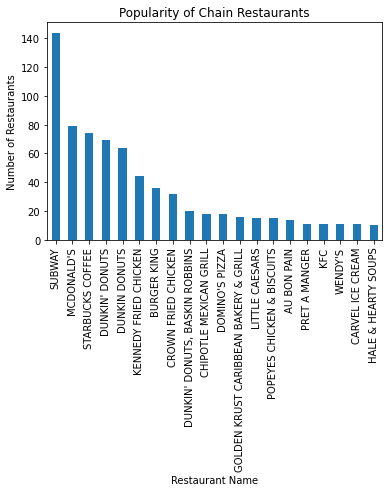

In [166]:
df_chains[:20].plot(kind='bar') # Find top 20
xlabel('Restaurant Name')
ylabel('Number of Restaurants')
title('Popularity of Chain Restaurants')

### Q5

In [167]:
(df_chains[df_chains >= 2]).sum() / len(df['RESTAURANT'].unique()) # Divide chains by unique

0.16472216729286138

### Q6

Text(0.5, 1.0, 'Non-Chain Restaurants in each Borough')

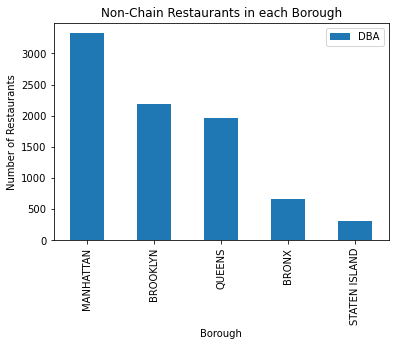

In [168]:
df2 = df.drop_duplicates('RESTAURANT') # Drop dupes
mask = df2['DBA'].value_counts() == 1 # Mask for single restaurants
df3 = df2[['DBA','BORO']] # Select particular columns
single_rest = df3[df3['DBA'].isin(mask.index[mask])].groupby('BORO').agg('count').drop('Missing') # Apply mask, aggregate data, and plot
single_rest.sort_values(by= 'DBA', ascending = False).plot(kind='bar')
xlabel('Borough')
ylabel('Number of Restaurants')
title('Non-Chain Restaurants in each Borough')

### Q7

Text(0.5, 1.0, 'Fraction of Non-Chain Restaurants in each Borough')

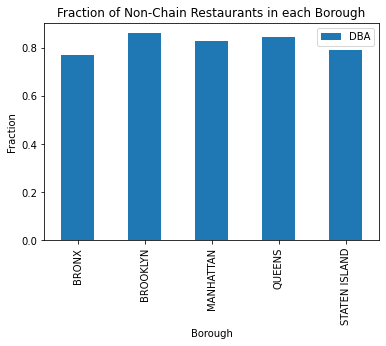

In [169]:
all_rest = df3.groupby('BORO').agg('count').drop('Missing')
(single_rest / all_rest).plot(kind='bar') # Get percent of non-chain in each borough
xlabel('Borough')
ylabel('Fraction')
title('Fraction of Non-Chain Restaurants in each Borough')

### Q8

Text(0.5, 1.0, 'Popularity of Cuisines')

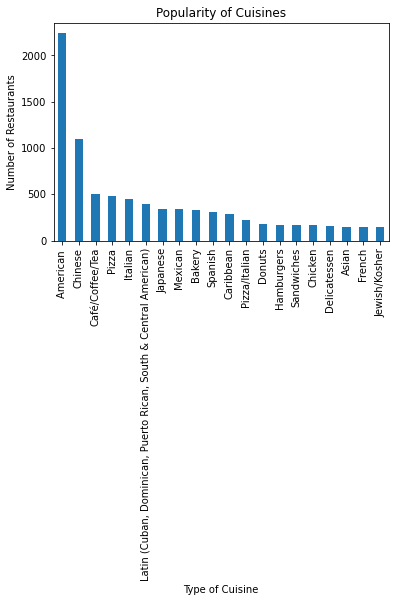

In [170]:
df4 = df.drop_duplicates(['RESTAURANT'])
df5 = df4['CUISINE DESCRIPTION'].value_counts() # Aggregate cuisine

df5[:20].plot(kind='bar') # Get top 20
xlabel('Type of Cuisine')
ylabel('Number of Restaurants')
title('Popularity of Cuisines')

### Q9

Text(0.5, 1.0, 'Popularity of Cuisines in Restaurants with no Violations')

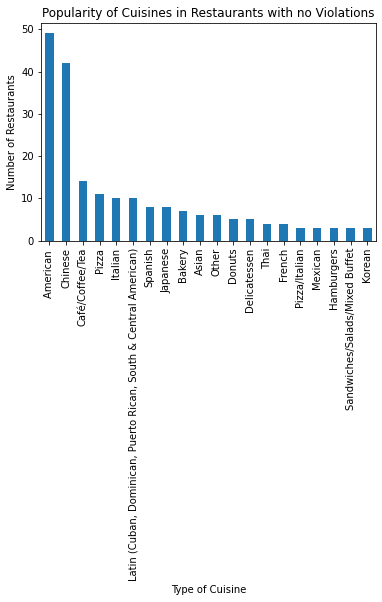

In [171]:
not_clean_rest = list(df[df['VIOLATION CODE'].notnull() == True]["RESTAURANT"]) # Get list of all violated restaurants
clean_rest =df[df['RESTAURANT'].apply(lambda x: x not in not_clean_rest)].copy() # Find those who have not done a violation
clean_rest = clean_rest.drop_duplicates('RESTAURANT') # Drop dupes 
clean_rest['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar') # Top 20 plot
xlabel('Type of Cuisine')
ylabel('Number of Restaurants')
title('Popularity of Cuisines in Restaurants with no Violations')

## Q10

In [172]:
(clean_rest['CUISINE DESCRIPTION'].value_counts() / df5)[df5 >= 20].sort_values(ascending = False)[:10] # Find ratio of clean to total restaurants

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

### Q11

In [173]:
df11 = df[df['VIOLATION DESCRIPTION'].notnull()] # Ignore nulls
df11 = df[df['BORO'] != 'Missing'] # Ignore the 'Missing' Borough
pivot_table = pd.pivot_table(df11, index='VIOLATION DESCRIPTION',
                            columns='BORO', values='RESTAURANT', aggfunc='count') # Pivot table of violations
pivot_table.idxmax() # Find max from pivot table

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

### Q12

In [174]:
violationFrequency = df11.groupby('VIOLATION DESCRIPTION')['RESTAURANT'].count().reset_index() # Group by violations and count # of restaurants
violation_boro_df = df11.groupby(['BORO','VIOLATION DESCRIPTION'])['RESTAURANT'].count().reset_index() # Group by violations and borough and then count again
violation_boro_frequency = pd.merge(violation_boro_df,violationFrequency, how='inner', on='VIOLATION DESCRIPTION') # Merge the two into one df
violation_boro_frequency['ratio'] = violation_boro_frequency['RESTAURANT_x']/violation_boro_frequency['RESTAURANT_y'] # Get ratio

violation_boro_maxes = violation_boro_frequency.groupby('BORO')['ratio'].max().reset_index() # Find the max ratio for each borough
violations_matching_max_in_boros = pd.merge(violation_boro_frequency, violation_boro_maxes, how='inner', on=['ratio','BORO']) # Merge previous line into df
violations_matching_max_in_boros[['BORO','VIOLATION DESCRIPTION','ratio']] # Display everything we need

,BORO,VIOLATION DESCRIPTION,ratio
0,BRONX,Unprotected food re-served.,0.500000
1,STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po...",0.090909
2,BROOKLYN,Precooked potentially hazardous food from comm...,0.714286
3,MANHATTAN,Out-of package sale of tobacco products observed.,1.000000
4,MANHATTAN,Potable water supply inadequate. Water or ice ...,1.000000
5,QUEENS,Caloric content range (minimum to maximum) not...,1.000000
6,QUEENS,"Harmful, noxious gas or vapor detected. CO ~1 ...",1.000000
7,QUEENS,Raw food not properly washed prior to serving.,1.000000


### Q13

In [175]:
phone_zipcode = df[['PHONE','ZIPCODE']].copy() # Isolate phone and zip
phone_zipcode['AREACODE'] = phone_zipcode['PHONE'].str[:3] # Find area code (first 3 numbers in phone)
area_code_zipcode = phone_zipcode.groupby('AREACODE')['ZIPCODE'].nunique() # Count the number of unique zips for each area
code_count = sum(area_code_zipcode == 1) # Count only when there was 1 unique zip for area
code_count

34

### Q14

In [176]:
df_street_misspellings = df.copy()
df_street_misspellings['STREET TYPE'] = df_street_misspellings['STREET'].str.split().str[-1] # Grab the last word in the street string by splitting on white space in string and grabbing the last word.
df_street_misspellings['STREET BASE'] = df_street_misspellings['STREET'].str.split().str[0:-1] # Grab all of the words except for the last one in the street strings. These will be output as a list
df_street_misspellings['STREET BASE'] = [','.join(map(str, l)) for l in df_street_misspellings['STREET BASE']] # Convert the list to a single string
df_street_misspellings['STREET BASE ZIP'] = df_street_misspellings['STREET BASE'] + " " + df_street_misspellings['ZIPCODE'] # Create new column from those above
df_street = df_street_misspellings[['STREET TYPE','STREET BASE','STREET BASE ZIP']].drop_duplicates() # Drop duplicates
df_street = df_street[df_street['STREET BASE'].notnull()] # Get rid of any nulls for street base
df_street = df_street[df_street['STREET BASE']!=''] # Get rid of any instance with an empty street base

df_street_merged = pd.merge(df_street,df_street,how='inner',on='STREET BASE ZIP') # merge the table on itself
df_different_street_types = df_street_merged[df_street_merged['STREET TYPE_x'] != df_street_merged['STREET TYPE_y']] # Keep only those records where the street types are different
cross_tab = pd.crosstab(df_different_street_types['STREET TYPE_x'],df_different_street_types['STREET TYPE_y'])
cross_tab.loc[:,['AVE','ST','RD','PL','BOULEARD','BULEVARD']].idxmax(axis=0)


STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object